
# Classification

## Demo 2 : Decision Tree in Python

In this demo, you will learn how to apply decision tree algorithm in Python using scikit-learn library.

---

## Problem Statement

The dataset contains information about 3 brands namely US,Japan, Europe. Other parameters are mpg, cylinders, cubicinches, hp, weightlbs, time-to-60, year. The task is to find the brand of a car using these parameters.

---

## Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from io import StringIO
%matplotlib inline

## Dataset

In [2]:
#Reading the dataset using pandas
car_data=pd.read_csv('cars.csv')
car_data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


## Data Analysis

In [3]:
#Dataset shape to get row and column count
car_data.shape

(261, 8)

<div style="background-color:##EDF9FF">
  <ul><li><h3>Checking Null Values</h3></li></ul>
</div>

In [4]:
#Checking for any null values
car_data.isnull().any()

mpg            False
cylinders      False
cubicinches    False
hp             False
weightlbs      False
time-to-60     False
year           False
brand          False
dtype: bool

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">
        None of the columns contain null values so there is no need to remove/replace data
    </span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3>Encoding Target Variable</h3></li></ul>
</div>

In [5]:
#Using labelencoder to encode the target variable
lb=LabelEncoder()
lb.fit(car_data['brand'])
car_data['brand']=lb.transform(car_data['brand'])


<div style="background-color:##EDF9FF">
  <ul><li><h3>Divide Feature And Target Varaibles</h3></li></ul>
</div>

In [6]:
#Divide the dataset into independent and dependent variables
X=car_data.drop('brand',axis=1)
y=car_data['brand']

<div style="background-color:##EDF9FF">
  <ul><li><h3>Training And Testing Set</h3></li></ul>
</div>

In [7]:
#Split the data into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) #20 percent of data will be used for testing purpose

## Decision Tree Training

The following parameters should be considered during training a decision tree:
- __criterion__: To measure quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
- __spliter__: Either 'best' to choose best split or 'random' to choose random best split. By default takes 'best' value.
- __max_features__: Number of features to consider.
- __max_depth__: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.


The classifier has several parameter which are used depending on the requirement. For more information about thsese parameters you can visit:<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>Decision Tree</a>

In [8]:
dt_car=DecisionTreeClassifier(criterion='entropy',splitter='best',max_features=3,max_depth=3)
dt_car.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Visualizing Decision Tree

In [9]:
#Saving the dot file as it requires additional dependencies
#This file can be converted into png or jpg using any online converters
graph_data=open('graph.dot','w')
export_graphviz(dt_car,out_file=graph_data,filled=True,special_characters=True,
                feature_names=list(X_train.columns),class_names=list(lb.classes_),rounded=True)
graph_data.close()

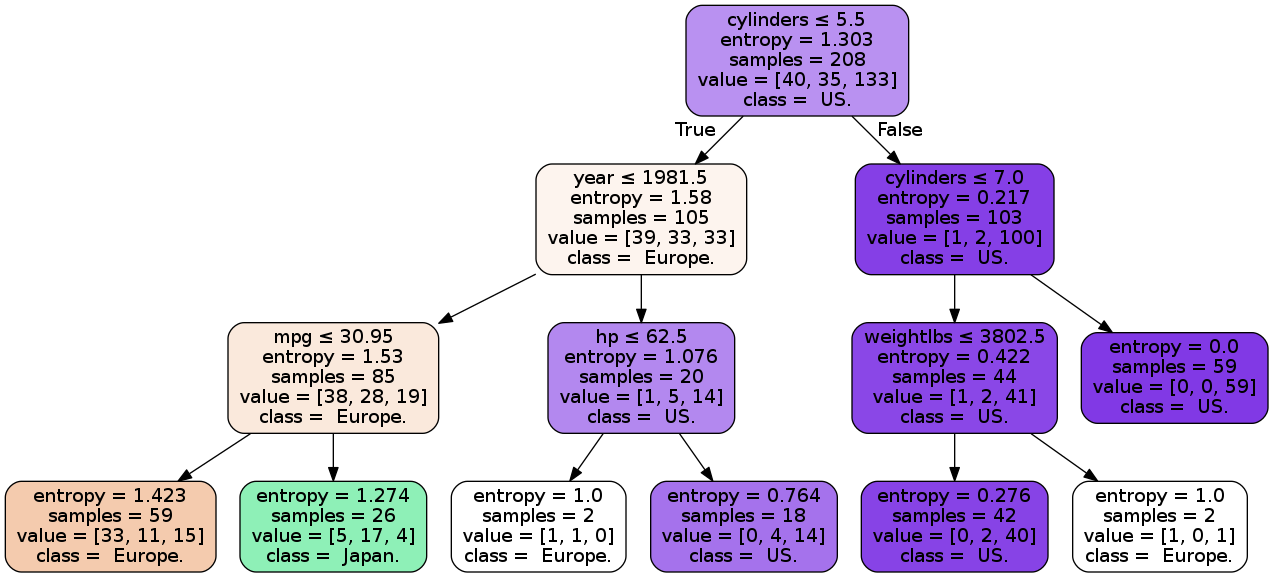

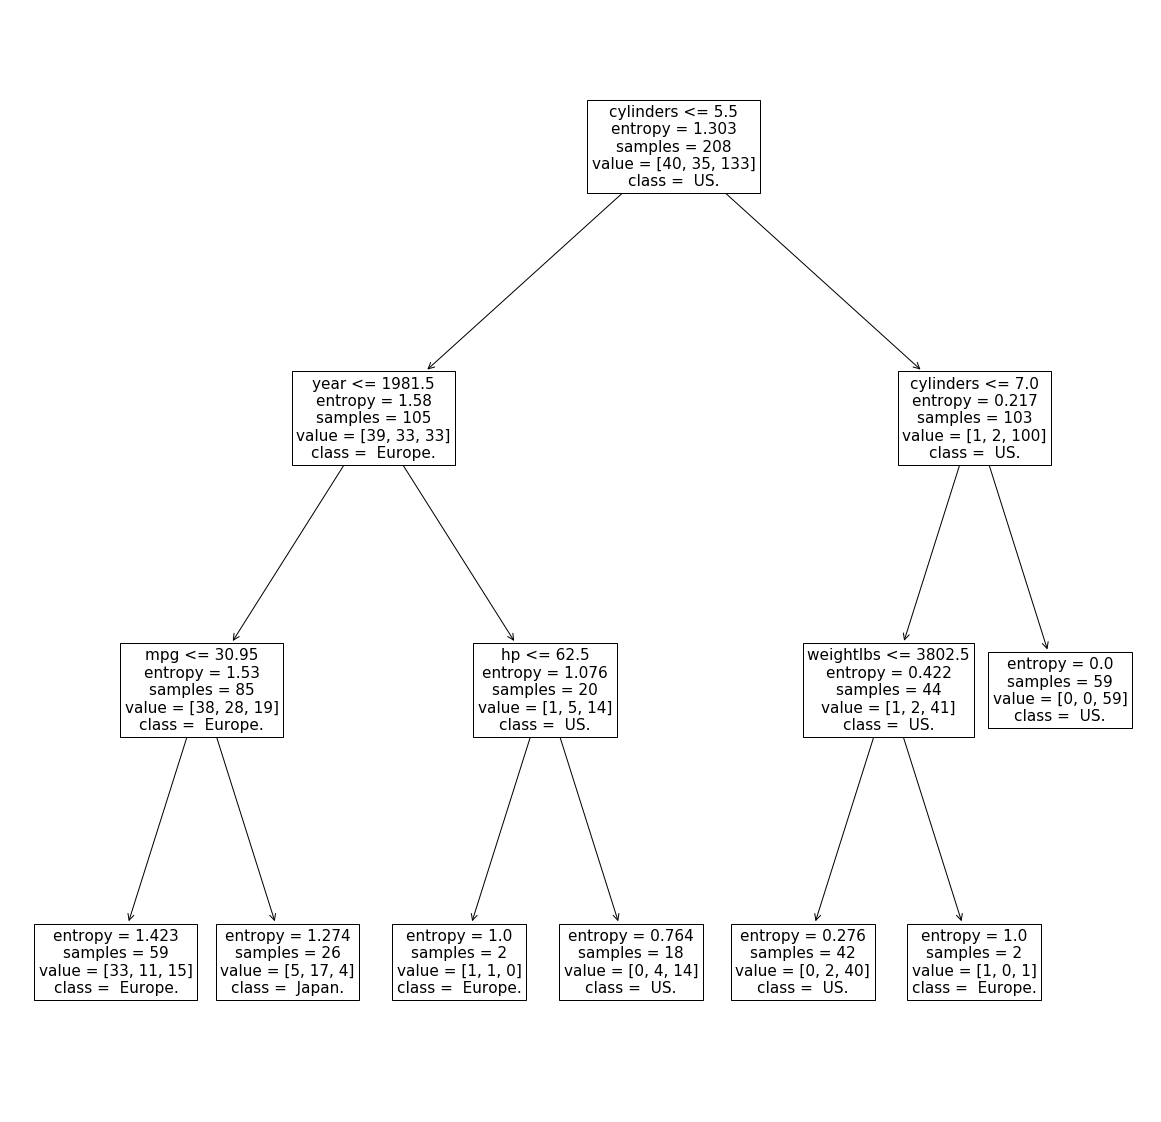

In [10]:
#plot tree can also be used for visualising the tree
plt.figure(figsize=(20,20))
plot_tree(dt_car,class_names=list(lb.classes_),feature_names=list(X_train.columns))
plt.show()

In [11]:
#Calculating accuracy
pred = dt_car.predict(X_test)
print('Accuracy is:',accuracy_score(y_test,pred))

Accuracy is: 0.5849056603773585


## Feature Importance

In [12]:
'''
- Selecting only the important features
'''
features=pd.DataFrame({'Features':X_train.columns,'Importance':np.round(dt_car.feature_importances_,3)})
features=features.sort_values('Importance',ascending=False)

In [13]:
features

,Features,Importance
1,cylinders,0.694
6,year,0.115
0,mpg,0.104
3,hp,0.046
4,weightlbs,0.040
2,cubicinches,0.000
5,time-to-60,0.000


<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">
        The above data shows which feature is important based on criterion provided
    </span>
</div>

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">
        We can select the required important features and retrain the model
    </span>
</div>

---

# Random Forest

The following parameters should be considered before using random forest classifier:
- __n_estimators__: Integer value to define number of trees in the forest.
- __criterion__: To measure quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

For information about rest of the parameters: <a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier'>Random Forest</a>

In [14]:
#Training
rf_car=RandomForestClassifier(n_estimators=100, criterion='entropy',max_depth=3)
rf_car.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Visualising 

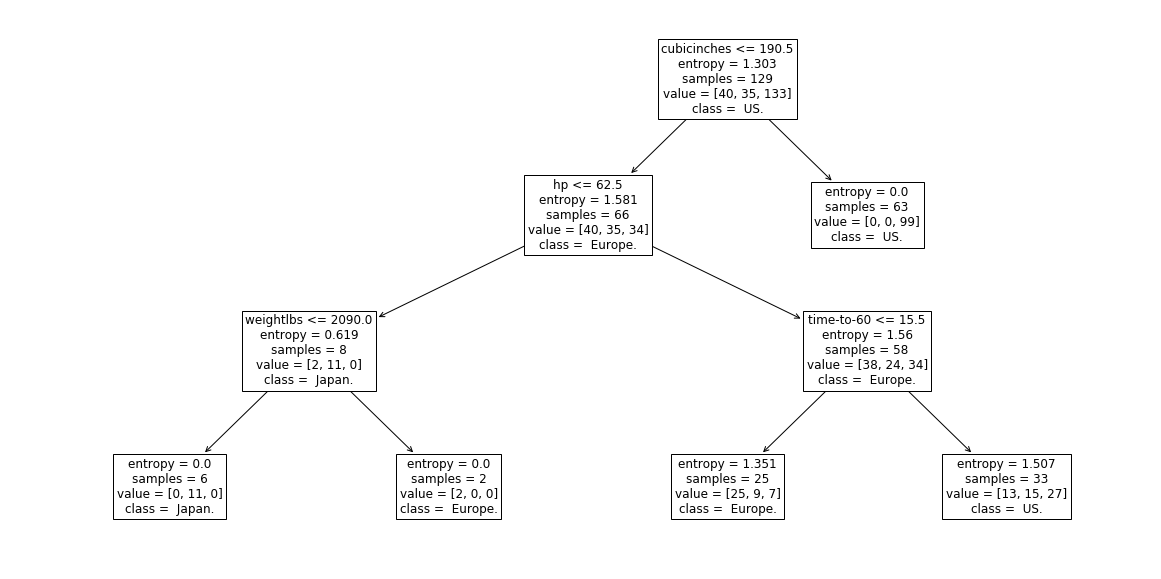

In [15]:
#Visualing a single estimator
plt.figure(figsize=(20,10))
plot_tree(rf_car.estimators_[5],feature_names=X_train.columns,class_names=list(lb.classes_),fontsize=12)
plt.show()

<b><i>Conclusion</i></b>: In this demonstration, we have learned to apply and visualize decision tree algorithm and random forest classifier.